# Irish

In [6]:
# iris_project.py

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# -------------------------------------------------
# 1) Load and prepare the data
# -------------------------------------------------

# Load CSV without header and assign column names manually
df = pd.read_csv(
    "iris.data.csv",
    header=None,
    names=["sepal_length", "sepal_width", "petal_length", "petal_width", "species"]
)

print("First 5 rows:")
print(df.head())
print("\nDataFrame shape:", df.shape)

# Check data types
print("\nData types:")
print(df.dtypes)

# Check for missing values
print("\nMissing values in each column:")
print(df.isna().sum())

df["petal_ratio"] = df["petal_length"] / df["petal_width"]

print("\nFirst 5 rows after adding petal_ratio:")
print(df.head())


First 5 rows:
   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa

DataFrame shape: (150, 5)

Data types:
sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

Missing values in each column:
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

First 5 rows after adding petal_ratio:
   sepal_length  sepal_width  petal_length  petal_width      species  \
0           5.1          3.5           1.4          0.2  Iris-setosa   
1           4.9          3.0           1.4          0.2  Iris-setosa   
2      

In [9]:
# -------------------------------------------------
# 3) Correlation analysis
# -------------------------------------------------

# Compute correlation matrix for numeric features
numeric_cols = ["sepal_length", "sepal_width", "petal_length", "petal_width", "petal_ratio"]
corr_matrix = df[numeric_cols].corr()
print("\nCorrelation matrix:")
print(corr_matrix)


Correlation matrix:
              sepal_length  sepal_width  petal_length  petal_width  \
sepal_length      1.000000    -0.109369      0.871754     0.817954   
sepal_width      -0.109369     1.000000     -0.420516    -0.356544   
petal_length      0.871754    -0.420516      1.000000     0.962757   
petal_width       0.817954    -0.356544      0.962757     1.000000   
petal_ratio      -0.563335     0.320919     -0.684091    -0.734370   

              petal_ratio  
sepal_length    -0.563335  
sepal_width      0.320919  
petal_length    -0.684091  
petal_width     -0.734370  
petal_ratio      1.000000  


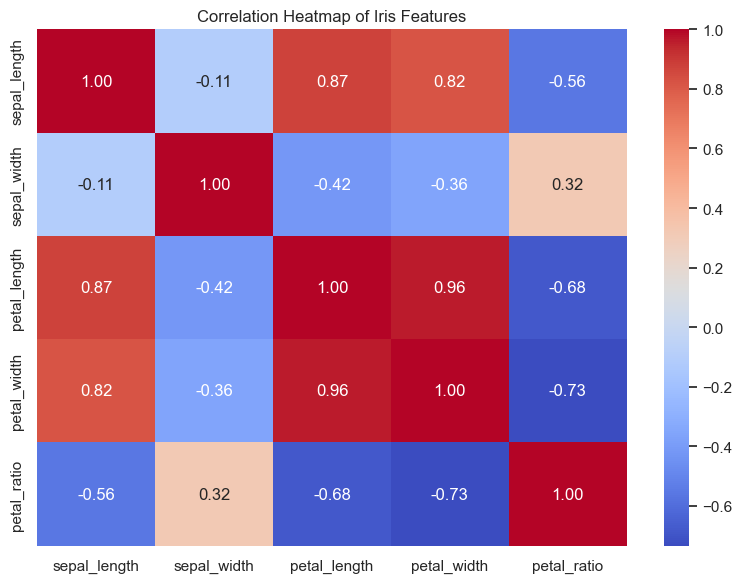

In [13]:
# -------------------------------------------------
# 4) Visualization settings
# -------------------------------------------------

sns.set(style="whitegrid")  # Optional: nicer style for plots

# 4-1) Heatmap of correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(
    corr_matrix,
    annot=True,      
    cmap="coolwarm", 
    fmt=".2f"
)
plt.title("Correlation Heatmap of Iris Features")
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

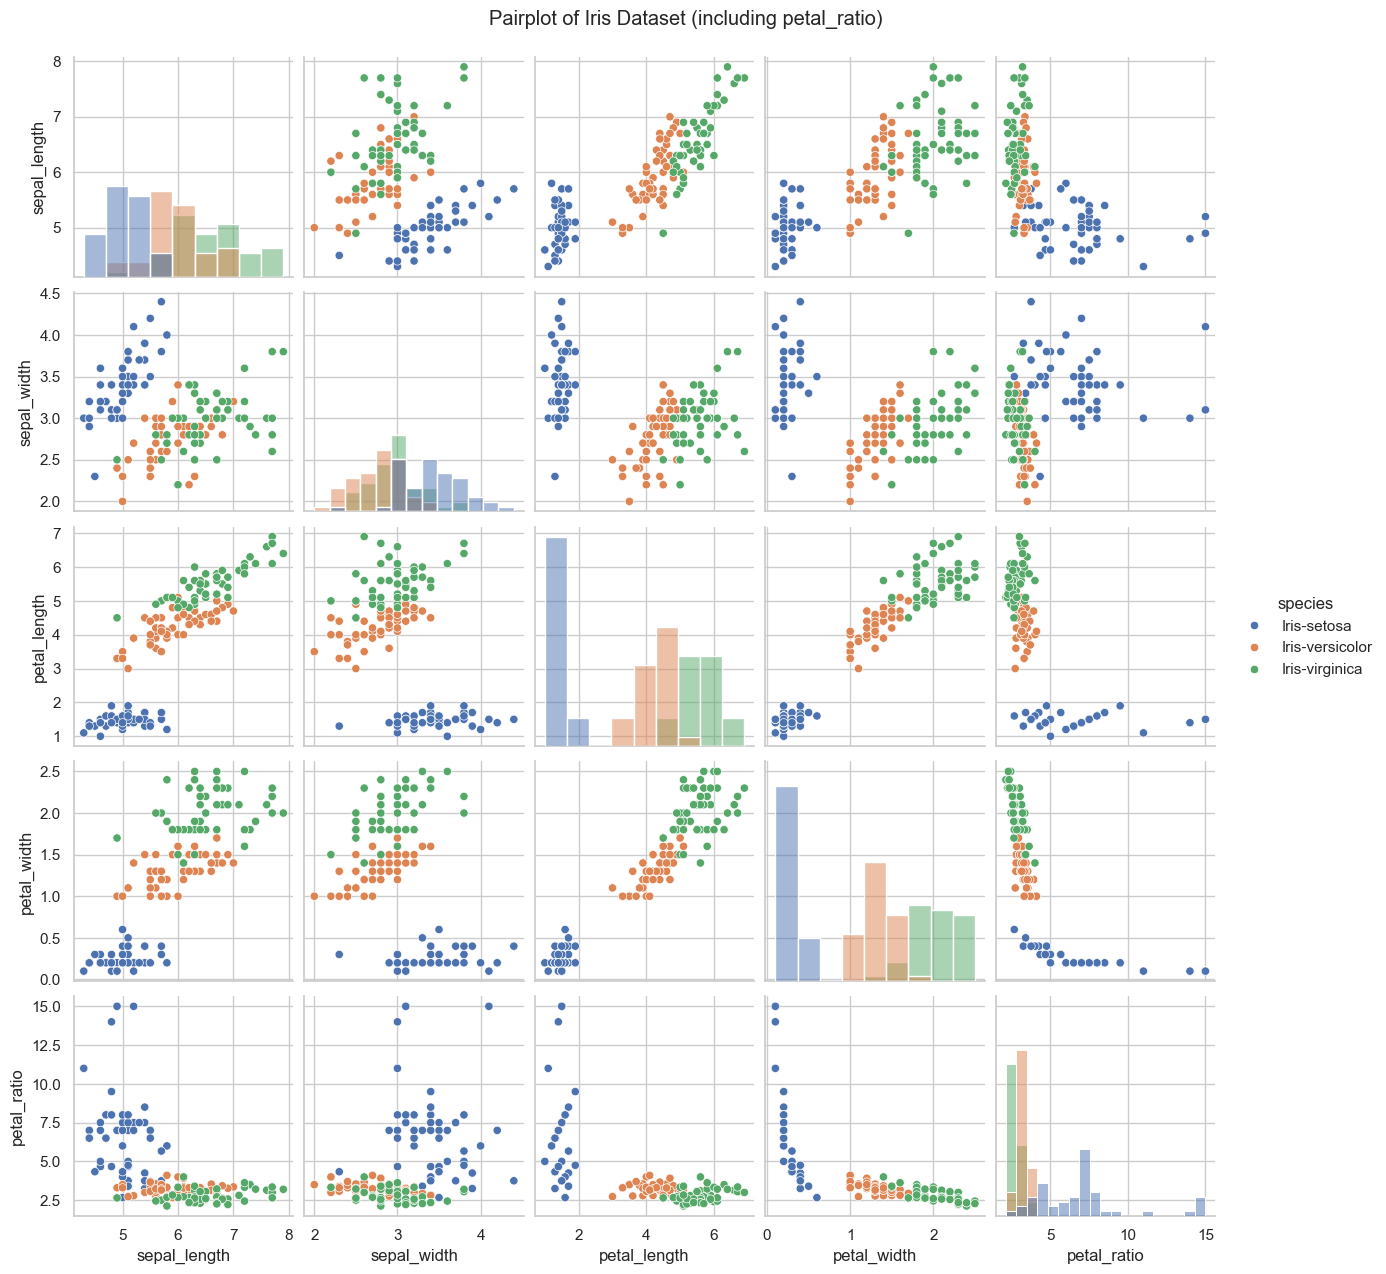

In [14]:
# 4-2) Pairplot (pairwise relationships)
plt.figure()  
sns.pairplot(
    df,
    vars=numeric_cols,  
    hue="species",      
    diag_kind="hist"
)
plt.suptitle("Pairplot of Iris Dataset (including petal_ratio)", y=1.02)
plt.show()

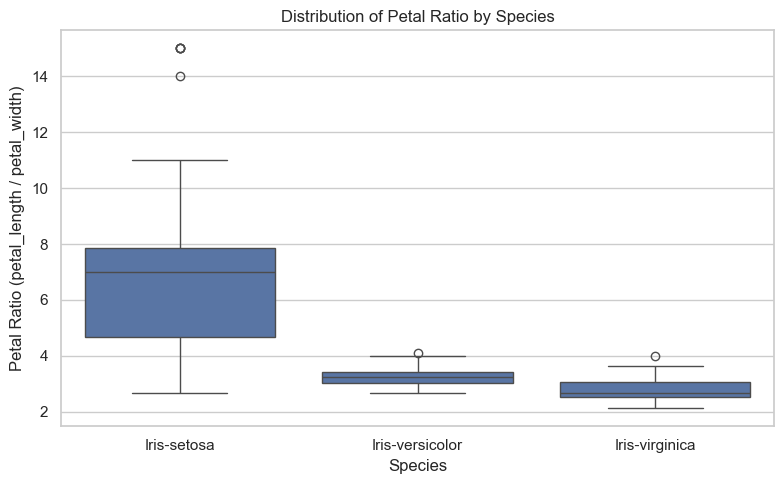

In [17]:
# 4-3) Boxplot of petal_ratio by species
plt.figure(figsize=(8, 5))
sns.boxplot(
    x="species",
    y="petal_ratio",
    data=df
)
plt.title("Distribution of Petal Ratio by Species")
plt.xlabel("Species")
plt.ylabel("Petal Ratio (petal_length / petal_width)")
plt.tight_layout()
plt.show()

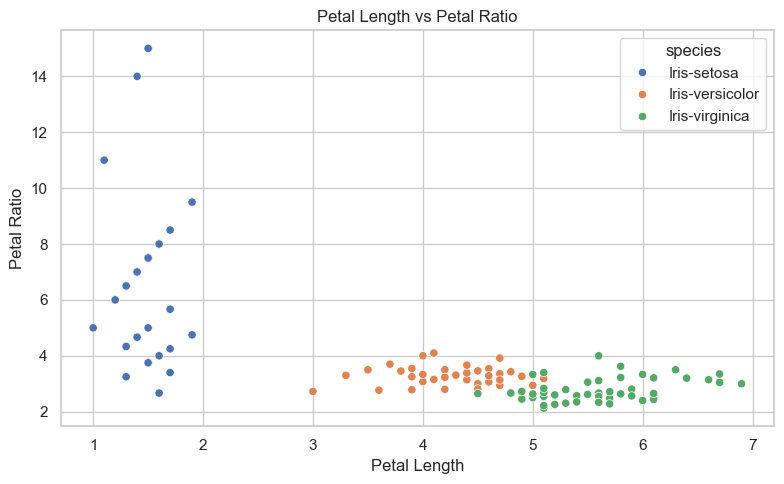

In [15]:
# 4-4) Scatter plot: petal_length vs petal_ratio
plt.figure(figsize=(8, 5))
sns.scatterplot(
    x="petal_length",
    y="petal_ratio",
    hue="species",
    data=df
)
plt.title("Petal Length vs Petal Ratio")
plt.xlabel("Petal Length")
plt.ylabel("Petal Ratio")
plt.tight_layout()
plt.show()

In [16]:
# -------------------------------------------------
# 5) Simple numerical summaries for analysis
# -------------------------------------------------

# Mean petal_ratio by species
mean_ratio_by_species = df.groupby("species")["petal_ratio"].mean()
print("\nMean petal_ratio by species:")
print(mean_ratio_by_species)

# Min and max petal_ratio by species
min_ratio_by_species = df.groupby("species")["petal_ratio"].min()
max_ratio_by_species = df.groupby("species")["petal_ratio"].max()

print("\nMin petal_ratio by species:")
print(min_ratio_by_species)

print("\nMax petal_ratio by species:")
print(max_ratio_by_species)

print("\nAnalysis finished.")


Mean petal_ratio by species:
species
Iris-setosa        7.078000
Iris-versicolor    3.242837
Iris-virginica     2.780662
Name: petal_ratio, dtype: float64

Min petal_ratio by species:
species
Iris-setosa        2.666667
Iris-versicolor    2.666667
Iris-virginica     2.125000
Name: petal_ratio, dtype: float64

Max petal_ratio by species:
species
Iris-setosa        15.0
Iris-versicolor     4.1
Iris-virginica      4.0
Name: petal_ratio, dtype: float64

Analysis finished.


 یک ویژگی بسیار قوی برای جداسازی سه گونه است  petal_ratio 
 Setosa ===> نسبتا بزرگ 
 Versicolor ===> متوسط
 Virginica ==>  کوچک
2-  ارابطه نسبت با طول گلبرگ وجود دارد، اما بسته به گونه متفاوت است
3 -نمودارها نشان می‌دهند که این ویژگی به‌تنهایی می‌تواند الگوی گونه‌ها را آشکار کند

# Climate change

Loading and preprocessing climate dataset...
Remaining countries after filtering: 240
Estimated global warming rate: 0.5133 °C per decade


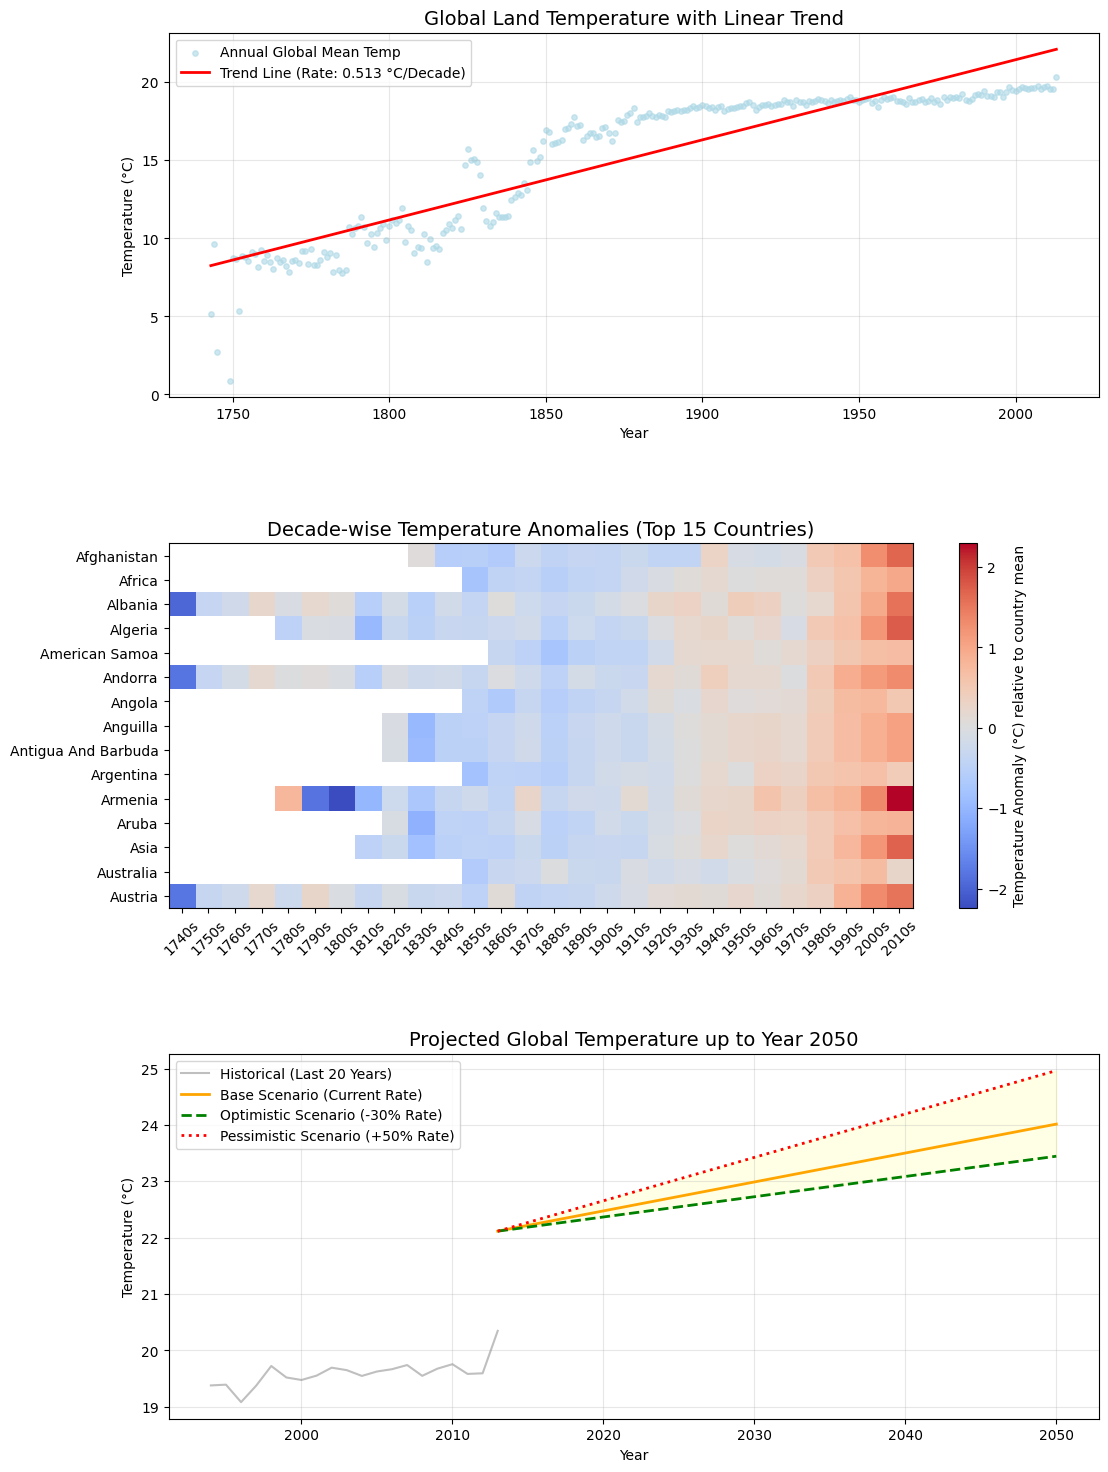

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def analyze_climate_data(file_path):
    # ---------------------------------------------------------
    # 1. DATA PREPARATION & CLEANING
    # ---------------------------------------------------------
    print("Loading climate dataset...")

    # Load CSV file
    try:
        df = pd.read_csv(file_path)
    except FileNotFoundError:
        print(f"File {file_path} not found. Please verify the path.")
        return

    # Convert date column to datetime format
    df['dt'] = pd.to_datetime(df['dt'])

    # Sort data by country and date 
    df = df.sort_values(['Country', 'dt'])

    # --- Filling NaN values using a centered 5-year rolling mean ---
    # This uses a rolling window of size 5, centered around each row.
    # min_periods=1 ensures mean is computed even if fewer neighbors exist.
    df['AverageTemperature'] = df.groupby('Country')['AverageTemperature'].transform(
        lambda x: x.fillna(x.rolling(window=5, min_periods=1, center=True).mean())
    )

    # Remove remaining NaN values (mostly at dataset boundaries)
    df.dropna(subset=['AverageTemperature'], inplace=True)

    # --- Add a Decade column ---
    df['Year'] = df['dt'].dt.year
    df['Decade_Num'] = (df['Year'] // 10) * 10
    df['Decade'] = df['Decade_Num'].astype(str) + 's'

    # --- Filter countries with at least 100 years of continuous data ---
    country_counts = df.groupby('Country')['Year'].nunique()
    valid_countries = country_counts[country_counts >= 100].index
    df_filtered = df[df['Country'].isin(valid_countries)].copy()

    print(f"Remaining countries after filtering: {len(valid_countries)}")

    # ---------------------------------------------------------
    # 2. NUMERICAL ANALYSIS
    # ---------------------------------------------------------

    # --- 2.1 Global mean temperature per year ---
    global_yearly_temp = df_filtered.groupby('Year')['AverageTemperature'].mean().reset_index()

    # Prepare data for heatmap (select 15 countries for readability)
    top_countries = df_filtered['Country'].unique()[:15]
    df_heatmap = df_filtered[df_filtered['Country'].isin(top_countries)]

    # Compute decade-wise mean for each country
    heatmap_data = df_heatmap.groupby(['Country', 'Decade_Num'])['AverageTemperature'].mean().unstack()

    # Normalize data per country (subtract each country’s mean)
    heatmap_data_normalized = heatmap_data.sub(heatmap_data.mean(axis=1), axis=0)

    # --- 2.2 Linear trend estimation using numpy.polyfit ---
    x = global_yearly_temp['Year'].values
    y = global_yearly_temp['AverageTemperature'].values

    # Fit a straight line: y = slope * x + intercept
    slope, intercept = np.polyfit(x, y, 1)
    trend_line = slope * x + intercept

    # Convert warming slope to °C per decade
    warming_rate_per_decade = slope * 10
    print(f"Estimated global warming rate: {warming_rate_per_decade:.4f} °C per decade")

    # --- 2.3 Temperature prediction until 2050 (3 scenarios) ---
    last_year = x.max()
    future_years = np.arange(last_year, 2051)

    # Starting temperature at last available point
    start_temp = slope * last_year + intercept
    years_delta = future_years - last_year

    # Scenario 1: Base — current warming rate
    pred_base = start_temp + (slope * years_delta)

    # Scenario 2: Optimistic — 30% reduced warming rate
    pred_optimistic = start_temp + (slope * 0.7 * years_delta)

    # Scenario 3: Pessimistic — 50% increased warming rate
    pred_pessimistic = start_temp + (slope * 1.5 * years_delta)

    # ---------------------------------------------------------
    # 3. VISUALIZATION (3 Subplots)
    # ---------------------------------------------------------

    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 18))
    plt.subplots_adjust(hspace=0.4)

    # --- Plot 1: Global temperature + linear trend ---
    ax1.scatter(x, y, color='lightblue', label='Annual Global Mean Temp', alpha=0.6, s=15)
    ax1.plot(x, trend_line, color='red', linewidth=2,
             label=f'Trend Line (Rate: {warming_rate_per_decade:.3f} °C/Decade)')
    ax1.set_title('Global Land Temperature with Linear Trend', fontsize=14)
    ax1.set_xlabel('Year')
    ax1.set_ylabel('Temperature (°C)')
    ax1.legend()
    ax1.grid(True, alpha=0.3)

    # --- Plot 2: Heatmap of decade-based temperature anomalies ---
    decades = heatmap_data_normalized.columns
    countries = heatmap_data_normalized.index

    im = ax2.imshow(heatmap_data_normalized, cmap='coolwarm', aspect='auto')

    ax2.set_xticks(np.arange(len(decades)))
    ax2.set_xticklabels([f"{d}s" for d in decades], rotation=45)
    ax2.set_yticks(np.arange(len(countries)))
    ax2.set_yticklabels(countries)
    ax2.set_title('Decade-wise Temperature Anomalies (Top 15 Countries)', fontsize=14)

    cbar = fig.colorbar(im, ax=ax2)
    cbar.set_label('Temperature Anomaly (°C) relative to country mean')

    # --- Plot 3: Temperature prediction under 3 different scenarios ---
    ax3.plot(x[-20:], y[-20:], color='gray',
             label='Historical (Last 20 Years)', alpha=0.5)

    ax3.plot(future_years, pred_base, color='orange', linewidth=2,
             label='Base Scenario (Current Rate)')

    ax3.plot(future_years, pred_optimistic, color='green', linestyle='--', linewidth=2,
             label='Optimistic Scenario (-30% Rate)')

    ax3.plot(future_years, pred_pessimistic, color='red', linestyle=':', linewidth=2,
             label='Pessimistic Scenario (+50% Rate)')

    ax3.fill_between(future_years, pred_optimistic, pred_pessimistic,
                     color='yellow', alpha=0.1)

    ax3.set_title('Projected Global Temperature up to Year 2050', fontsize=14)
    ax3.set_xlabel('Year')
    ax3.set_ylabel('Temperature (°C)')
    ax3.legend()
    ax3.grid(True, alpha=0.3)

    # Display all plots
    plt.show()


# Run (ensure CSV file exists in the same folder)
analyze_climate_data('GlobalLandTemperaturesByCountry.csv')


# 3  Text Processing

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Read the CSV file into a DataFrame
df = pd.read_csv("reviews.csv")

# 2. Check if 'ReviewText' column exists
if 'ReviewText' not in df.columns:
    raise ValueError("The 'ReviewText' column is missing in the CSV file.")

# 3. Drop missing values in 'ReviewText' column
df = df.dropna(subset=['ReviewText'])
df

,ReviewText
0,This product is amazing and very useful!
1,I didn’t like the quality of the material.
2,Good value for money.
3,"Terrible experience, won’t buy again."
4,Absolutely loved it!
5,The product broke after one week.
6,Really happy with the performance.
7,Not worth the price.
8,Excellent build quality and fast delivery.
9,Disappointing experience overall.


In [20]:
# 1. Create a new column 'TextLength' with number of characters in each review
df['TextLength'] = df['ReviewText'].apply(len)

# 2. Create a new column 'WordCount' with number of words in each review
df['WordCount'] = df['ReviewText'].apply(lambda x: len(x.split()))
df

,ReviewText,TextLength,WordCount
0,This product is amazing and very useful!,40,7
1,I didn’t like the quality of the material.,42,8
2,Good value for money.,21,4
3,"Terrible experience, won’t buy again.",37,5
4,Absolutely loved it!,20,3
5,The product broke after one week.,33,6
6,Really happy with the performance.,34,5
7,Not worth the price.,20,4
8,Excellent build quality and fast delivery.,42,6
9,Disappointing experience overall.,33,3


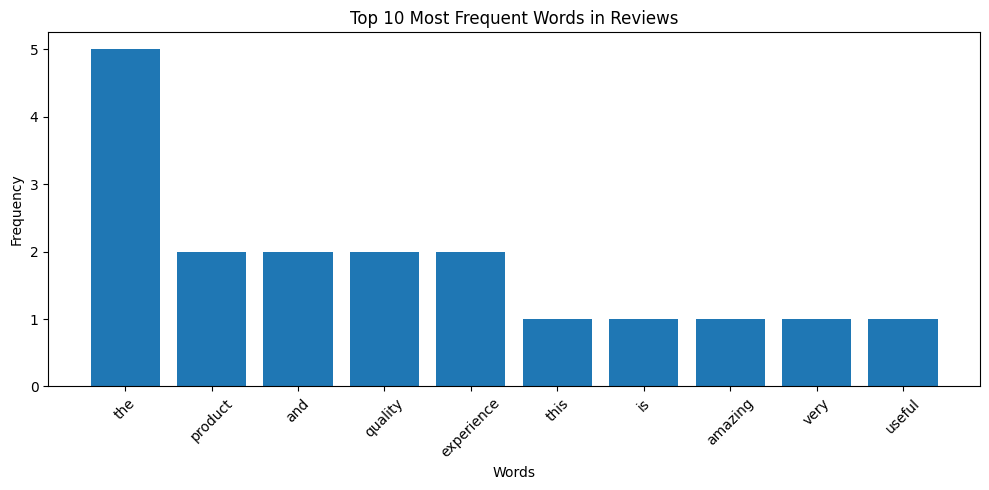

Top 10 Most Frequent Words:
         word  count
0         the      5
1     product      2
2         and      2
3     quality      2
4  experience      2
5        this      1
6          is      1
7     amazing      1
8        very      1
9      useful      1


In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import string

# ==========================
# Step 1: Load and clean data
# ==========================

# 1.1 Read CSV file
df = pd.read_csv("reviews.csv")

# 1.2 Ensure ReviewText column exists
if "ReviewText" not in df.columns:
    raise ValueError("The CSV file must contain a 'ReviewText' column.")

# 1.3 Drop or fill NaN values
df["ReviewText"] = df["ReviewText"].fillna("")   # or: df.dropna(subset=["ReviewText"], inplace=True)

# ==========================
# Step 2: Basic text features
# ==========================

# 2.1 Text length in characters
df["TextLength"] = df["ReviewText"].apply(len)

# 2.2 Word count per review
df["WordCount"] = df["ReviewText"].apply(lambda x: len(x.split()))

# ==========================
# Step 3: Word frequency analysis
# ==========================

# 3.1 Combine all text into one big string
all_text = " ".join(df["ReviewText"].tolist())

# 3.2 Basic cleaning: lowercase, remove punctuation
all_text = all_text.lower()
all_text = all_text.translate(str.maketrans("", "", string.punctuation))

# 3.3 Tokenize (split into words)
tokens = all_text.split()

# 3.4 Count word frequencies
word_freq = Counter(tokens)

# Get top 10 most common words
top10 = word_freq.most_common(10)

# Convert to DataFrame for easy plotting
freq_df = pd.DataFrame(top10, columns=["word", "count"])

# ==========================
# Step 4: Visualization
# ==========================

plt.figure(figsize=(10, 5))
plt.bar(freq_df["word"], freq_df["count"])
plt.title("Top 10 Most Frequent Words in Reviews")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ==========================
# Step 5: Print results
# ==========================
print("Top 10 Most Frequent Words:")
print(freq_df)


# Face Unlock

In [9]:
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# ============================================
# Utility functions for image processing
# ============================================

def load_image_gray(path):
    """
    Load an image from disk and convert it to grayscale.
    - If image is RGB, converts to grayscale using luminosity method.
    - Normalizes pixel values to [0, 1] as float32.
    """
    img = plt.imread(path)

    # Ensure float32
    img = img.astype(np.float32)

    # Some formats may return uint8 [0,255], some float [0,1]
    if img.max() > 1.0:
        img = img / 255.0  # normalize to [0, 1]

    if img.ndim == 3:
        # Convert RGB to grayscale using standard weights
        # Y = 0.299 R + 0.587 G + 0.114 B
        r = img[:, :, 0]
        g = img[:, :, 1]
        b = img[:, :, 2]
        gray = 0.299 * r + 0.587 * g + 0.114 * b
    else:
        # Already grayscale
        gray = img

    return gray


def crop_to_same_size(img1, img2):
    """
    Crop two images to the same (minimum) height and width.
    """
    h = min(img1.shape[0], img2.shape[0])
    w = min(img1.shape[1], img2.shape[1])

    img1_cropped = img1[:h, :w]
    img2_cropped = img2[:h, :w]

    return img1_cropped, img2_cropped


def compute_mae_mse(img1, img2):
    """
    Compute Mean Absolute Error (MAE) and Mean Squared Error (MSE)
    between two images of the same shape.
    """
    diff = img1 - img2
    mae = np.mean(np.abs(diff))
    mse = np.mean(diff ** 2)
    return mae, mse


# ============================================
# Single comparison: simulate Face Unlock
# ============================================

def face_unlock_single(ref_path, input_path, mae_threshold=0.05, mse_threshold=0.01):
    """
    Compare a reference face with a single input face image.

    - Loads images in grayscale
    - Crops them to the same size
    - Computes MAE and MSE
    - Shows both images side-by-side with decision text
    """
    if not os.path.exists(ref_path):
        raise FileNotFoundError(f"Reference image not found: {ref_path}")
    if not os.path.exists(input_path):
        raise FileNotFoundError(f"Input image not found: {input_path}")

    ref_img = load_image_gray(ref_path)
    in_img = load_image_gray(input_path)

    ref_img, in_img = crop_to_same_size(ref_img, in_img)

    mae, mse = compute_mae_mse(ref_img, in_img)

    # Simple decision rule (AND condition)
    is_match = (mae < mae_threshold) and (mse < mse_threshold)

    # Visualization
    plt.figure(figsize=(8, 4))

    plt.subplot(1, 2, 1)
    plt.imshow(ref_img, cmap="gray")
    plt.axis("off")
    plt.title("Reference Face")

    plt.subplot(1, 2, 2)
    plt.imshow(in_img, cmap="gray")
    plt.axis("off")

    title_text = f"MAE={mae:.4f}, MSE={mse:.4f}\n"
    if is_match:
        title_text += "Result: FACE MATCHED"
    else:
        title_text += "Result: FACE NOT MATCHED"

    plt.title(title_text)

    plt.suptitle("Simple Face Unlock Simulation", fontsize=14)
    plt.tight_layout()
    plt.show()

    return mae, mse, is_match


# ============================================
# Multiple comparisons: analysis with DataFrame
# ============================================

def face_unlock_batch(ref_path, input_pattern="face_input_*.png",
                      mae_threshold=0.05, mse_threshold=0.01):
   
    if not os.path.exists(ref_path):
        raise FileNotFoundError(f"Reference image not found: {ref_path}")

    ref_img = load_image_gray(ref_path)

    input_paths = sorted(glob.glob(input_pattern))
    if not input_paths:
        raise FileNotFoundError(f"No input images found for pattern: {input_pattern}")

    records = []

    for path in input_paths:
        in_img = load_image_gray(path)
        # Ensure same size
        ref_c, in_c = crop_to_same_size(ref_img, in_img)
        mae, mse = compute_mae_mse(ref_c, in_c)
        is_match = (mae < mae_threshold) and (mse < mse_threshold)

        records.append({
            "input_image": os.path.basename(path),
            "mae": mae,
            "mse": mse,
            "is_match": is_match
        })

    df = pd.DataFrame(records)

    # Plot bar chart for MSE values
    plt.figure(figsize=(8, 4))
    plt.bar(df["input_image"], df["mse"])
    plt.xticks(rotation=45, ha="right")
    plt.ylabel("MSE")
    plt.title("MSE between reference face and input faces")
    plt.tight_layout()
    plt.show()

    return df


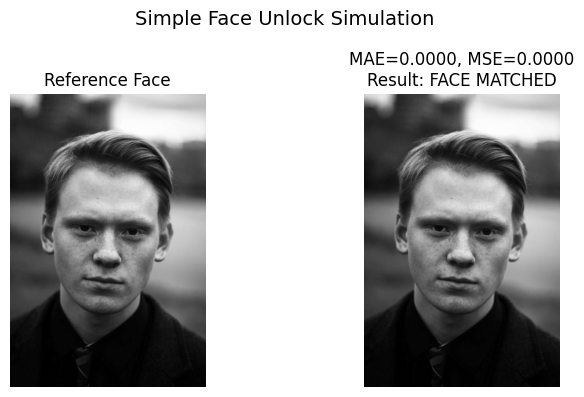

(np.float32(0.0), np.float32(0.0), np.True_)

In [30]:
ref_path = "face_reference.jpg"
input_path = "face_input_1.jpg"
face_unlock_single(ref_path, input_path, mae_threshold=0.05, mse_threshold=0.01)

In [31]:
import os
import matplotlib.pyplot as plt
import pandas as pd

def show_four_faces_with_metrics(ref_path, input_paths,
                                 mae_threshold=0.05, mse_threshold=0.01):
    """
    Show reference face and three variations side-by-side (4 subplots).
    - input_paths: list of 4 image paths where the first one is the reference
    - Returns: pandas.DataFrame with metrics for each image
    """
    if not os.path.exists(ref_path):
        raise FileNotFoundError(f"Reference image not found: {ref_path}")
    
    # Load reference once
    ref_img_full = load_image_gray(ref_path)
    
    # We expect 4 images in total (1 ref + 3 modified)
    if len(input_paths) != 4:
        raise ValueError("Please provide exactly 4 image paths in input_paths.")
    
    # Prepare figure with 1 row and 4 columns
    fig, axes = plt.subplots(1, 4, figsize=(16, 4))
    
    # List to collect metric results for DataFrame
    results = []
    
    for idx, (ax, path) in enumerate(zip(axes, input_paths)):
        if not os.path.exists(path):
            raise FileNotFoundError(f"Input image not found: {path}")
        
        in_img_full = load_image_gray(path)
        
        # Crop both to same size
        ref_img, in_img = crop_to_same_size(ref_img_full, in_img_full)
        
        # Compute metrics
        mae, mse = compute_mae_mse(ref_img, in_img)
        is_match = (mae < mae_threshold) and (mse < mse_threshold)
        
        # Show the input image (not the reference) in subplot
        ax.imshow(in_img, cmap="gray")
        ax.axis("off")
        
        # Build a descriptive label
        if idx == 0:
            label = "Reference"
        else:
            label = f"Modified {idx}"
        
        title_text = f"{label}\nMAE={mae:.4f}, MSE={mse:.4f}\n"
        title_text += "MATCHED" if is_match else "NOT MATCHED"
        ax.set_title(title_text, fontsize=9)

        # Save metrics for this image to results list
        results.append({
            "label": label,
            "image_path": path,
            "MAE": mae,
            "MSE": mse,
            "is_match": is_match
        })
    
    fig.suptitle("Face Comparison: Reference vs Modified Images", fontsize=14)
    plt.tight_layout()
    plt.show()

    # Create DataFrame from results
    df = pd.DataFrame(results)
    print(df)

    # Plot bar chart of MSE for each image
    plt.figure(figsize=(6, 4))
    plt.bar(df["label"], df["MSE"])
    plt.title("MSE for Each Image")
    plt.xlabel("Image")
    plt.ylabel("MSE")
    plt.tight_layout()
    plt.show()

    return df


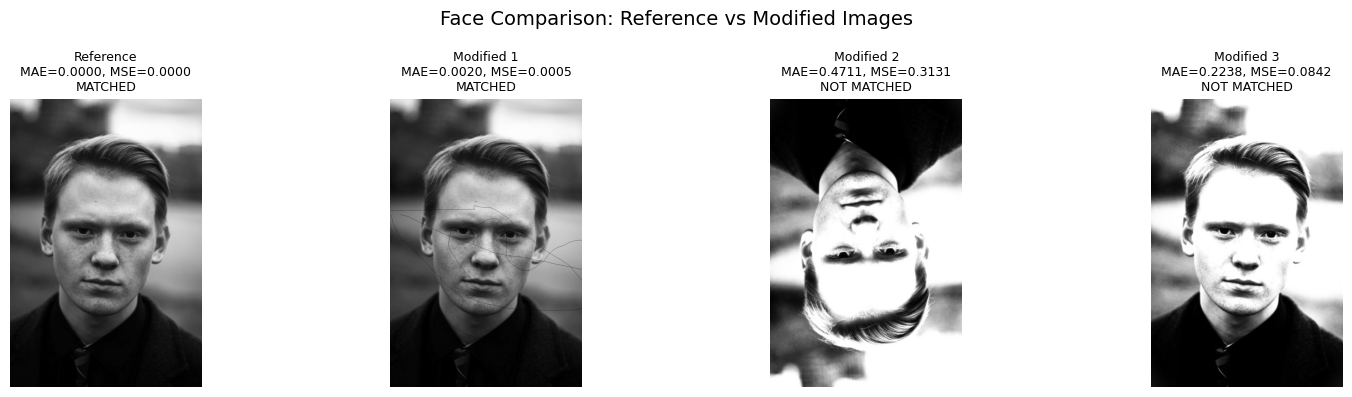

        label           image_path       MAE       MSE  is_match
0   Reference   face_reference.jpg  0.000000  0.000000      True
1  Modified 1  face_modified_1.jpg  0.002016  0.000537      True
2  Modified 2  face_modified_2.jpg  0.471094  0.313102     False
3  Modified 3  face_modified_3.jpg  0.223776  0.084174     False


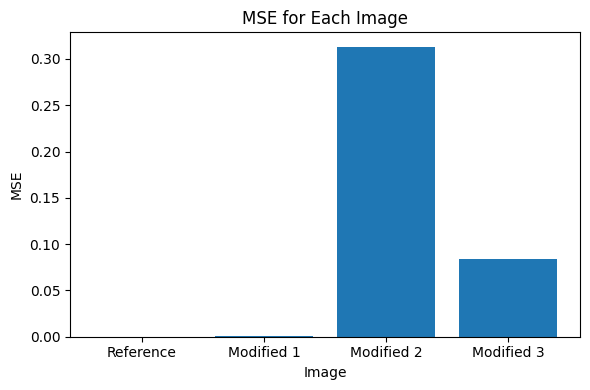

,label,image_path,MAE,MSE,is_match
0,Reference,face_reference.jpg,0.000000,0.000000,True
1,Modified 1,face_modified_1.jpg,0.002016,0.000537,True
2,Modified 2,face_modified_2.jpg,0.471094,0.313102,False
3,Modified 3,face_modified_3.jpg,0.223776,0.084174,False


In [33]:
ref_image_path = "face_reference.jpg"

input_paths = [
    "face_reference.jpg",    
    "face_modified_1.jpg",   
    "face_modified_2.jpg",  
    "face_modified_3.jpg",   
]

show_four_faces_with_metrics(ref_image_path, input_paths,
                             mae_threshold=0.05, mse_threshold=0.01)


بین دو تصویر خام، تقریباً هر تغییری که باعث تفاوت پیکسلی شود می‌تواند سیستم را گمراه کند  MAE/MSE در روش 